In [ ]:
# Por: Efrain Hernandez Pedraza 
# El dataset fue tomado de una competencia de kaggle, en el siguiente link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/discussion
# Entrega 1  

In [3]:
#Import libraries
! pip install chart-studio
import numpy as np
import pandas as pd
from chart_studio import plotly
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Entrega 1


In [4]:
df = pd.read_csv(r"C:\Users\usuario\Documents\data structures and algorithms\Proyecto\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Aqui logramos ver estadistica descriptiva basica de las variables numericas
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### De la estadistica descriptiva de arriba se pueden concluir 3 cosas
- El promedio de cargos mensuales es de 64.76 USD mientras que el 25% de los consumidores paga mas de 89 USD al mes.
- 75% de los consumidores mantienen la suscripcion/sevicio menos de 55 meses.

In [7]:
df.shape

(7043, 21)

In [8]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

# Tasa de abandono de consumidores

In [9]:
fig = px.histogram(
    df,
    x="Churn",
    title="Tasa abandono consumidores",
    height=700,
    template="plotly_dark",
)
fig.update_traces(
    marker_color="rgb(8,48,107)",
    marker_line_color="rgb(8,48,107)",
    marker_line_width=2,
    opacity=0.6,
)
fig.show()

In [10]:
df["Churn"].value_counts() / len(df["Churn"]) * 100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

- Los datos estan muy imbalanciados, tienen un ratio de 73.4 a 26.5
- Por ello los datos a analizar deben ser con otras caracteristicas para poder sacar mejores concluciones

c:\Users\usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



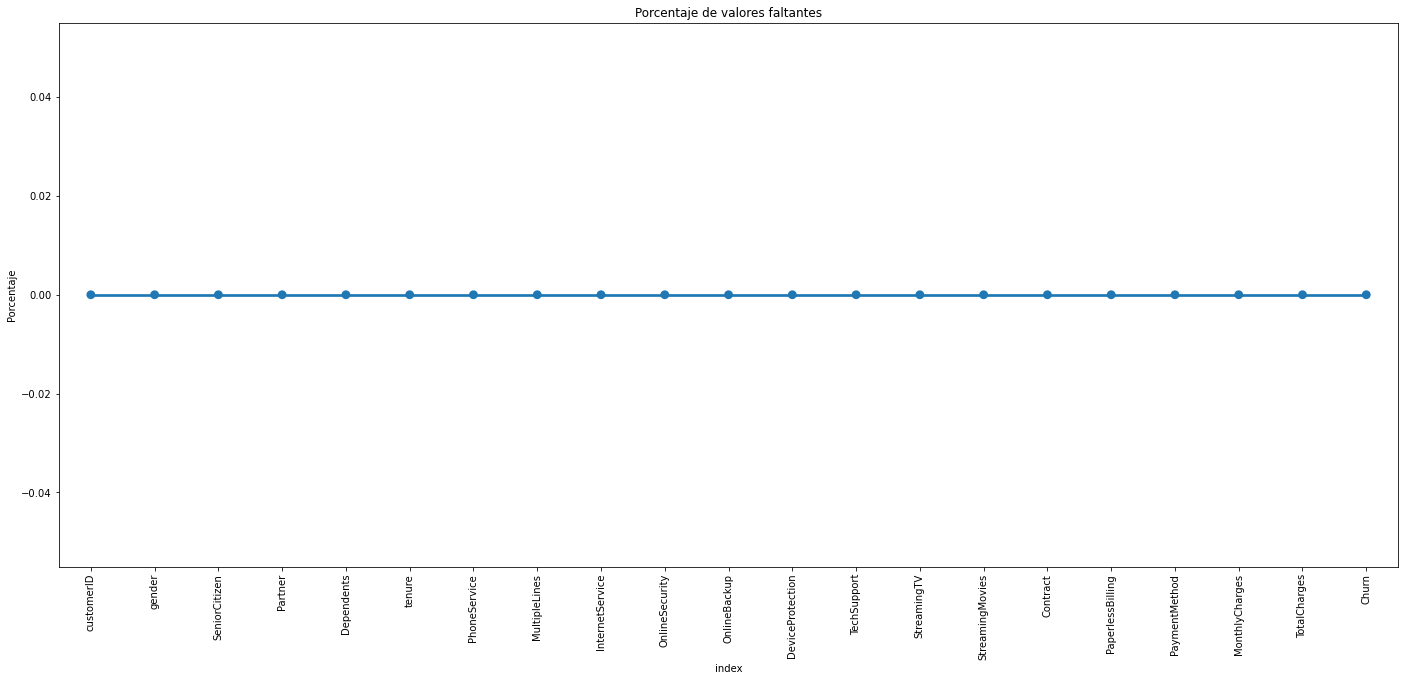

In [11]:
df_faltantes = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
plt.figure(figsize=(24, 10))
ax = sns.pointplot("index", 0, data=df_faltantes)
plt.xticks(rotation=90, fontsize=10)
plt.title("Porcentaje de valores faltantes")
plt.ylabel("Porcentaje")
plt.show()

# Datos Faltante
- Se evidencia que no se poseen datos faltantes.
# Reglas a seguir:
- A las categorias que poseen mucha cantidad de valores faltantes se deben eliminar por que lo unico que hacen es dañar el analisis.
- Las categorias que posean un numero de valores faltantes moderado, se les pueden aplicar ciertas tecnicas como llenarlo con la media o la mediana, etc.
- Las decisiones se deben tomar con cuidado ya que hay columnas las cuales pueden servir los valores nulos para inferir ciertas cosas.

# Limpieza de datos

In [12]:
df1 = df.copy()
df1.TotalCharges = pd.to_numeric(df1.TotalCharges, errors="coerce")
df1.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
#Aqui queremos observar los valores faltantes.
df1.loc[df1 ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Tratamiento de datos faltantes

In [14]:
# Al ser estos valores muy pocos (solo equivalen al 0.15%) se pueden omitir
df1.dropna(how = 'any', inplace = True)

- Dividimos los consumidores en base a la categoria tenure

In [15]:
# Los dividimos de a 12 meses
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df1["group_tenure"] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [16]:
df1['group_tenure'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: group_tenure, dtype: int64

- Borramos las columnas que no nos van a hacer falta (customerID, tenure)

In [17]:
df1.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,group_tenure
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# EDA

#### Analisis univarido

In [51]:
def grafica_iterativa_univariada(n, i):
    fig = px.histogram(
        df1,
        x=n,
        height=700,
        template="plotly_dark",
        color="Churn",
        barmode="group",
    )
    fig.update_traces(
        marker_color="rgb(8,48,107)",
        marker_line_color="rgb(8,48,107)",
        marker_line_width=2,
        opacity=0.5,
    )
    

    fig.show()


for i, predictor in enumerate(
    df1.drop(columns=["Churn", "TotalCharges", "MonthlyCharges"])
):
    grafica_iterativa_univariada(predictor,i)

#### Analisis Bivariado

In [19]:
#Para ello debemos convertir las variables yes y no a binarios 
df1['Churn'] = np.where(df1.Churn == 'Yes',1,0)

In [20]:
df1_0=df1.loc[df1["Churn"]==0]
df1_1=df1.loc[df1["Churn"]==1]
df1_1

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,group_tenure
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12
5,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,1 - 12
8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,25 - 36
13,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,49 - 60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,1,1 - 12
7026,Female,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,1,1 - 12
7032,Male,1,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,1,1 - 12
7034,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,1,61 - 72


In [52]:
def analisis_binario(df, title, col, i):
    fig = px.histogram(
        df,
        x=col,
        title=title,
        height=700,
        template="plotly_dark",
        color=i,
        barmode="group",
    )
    fig.update_traces(
        marker_color="rgb(8,48,107)",
        marker_line_color="rgb(8,48,107)",
        marker_line_width=2,
        opacity=0.5,
    )

    fig.show()
    

In [53]:
analisis_binario(
    df1_1,
    title="Distribucion de género para clientes que abanonan la suscripcion  ",
    col="Partner",
    i="gender",
)

In [54]:
analisis_binario(
    df1_0,
    title="Distribucion de género para clientes que no abanonan la suscripcion  ",
    col="Partner",
    i="gender",
)

In [55]:
analisis_binario(
    df1_1,
    title="Distribucion de metodo de pago para clientes que abanonan la suscripcion",
    col="PaymentMethod",
    i="gender",
)

In [56]:
analisis_binario(
    df1_1,
    title="Distribucion de contratos para clientes que abanonan la suscripcion",
    col="Contract",
    i="gender",
)

In [57]:
analisis_binario(
    df1_1,
    title="Distribucion  de personas jubiladas para clientes que abanonan la suscripcion",
    col="SeniorCitizen",
    i="gender",
)

### Conclusion analisis bivariado
- Los cheques electronicos son el metodo de pago mas propenso para las personas abandonar, esto es interesante ya que en el mismo grafico se evidencia que las personas que menos abandonan son las que tienen pagos automaticos, en base a esto lo mejor seria implementar un sistema de pagos automaticos para todos los clientes.
- Los consumidores mes a mes son los mas propensos a abandonar, esto tiene sentido ya que por ello yo incurren en un contrato mas largo, podria postularse un contrato minimo de 3 meses para que el cliente este en la obligacion de quedarse, al hacer esto al estar comprometido con pagos, asi no siga luego se vera en la "obligacion" de consumir el servicio por lo que si no esta conforme nos podra expresar esas inconformidades y en base a eso hacer mejoras en general para todos los clients.
- Los clientes que no son jubilados son mas propensos a abandonar, esto se puede deber a factores economicos, ya  que quiza al ser personas mas jovenes el publico objetivo esto puede llevar a gente con mayor inestabilidad economica.

3. Convertir las variables categoricas en variables dummy

In [27]:
df_dummies = pd.get_dummies(df1)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,group_tenure_1 - 12,group_tenure_13 - 24,group_tenure_25 - 36,group_tenure_37 - 48,group_tenure_49 - 60,group_tenure_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


#### Analisis multivariado

In [34]:
fig = px.scatter(df_dummies, x="MonthlyCharges", y="TotalCharges",height=700, width=700, 
        template="plotly_dark")
fig.show()

- Los cargos incrementan a medida que los cargos mensuales aumentan, asi se esperaba que fuera

In [50]:
fig = px.imshow(
    df_dummies.corr(), text_auto=True, height=1000, width=1000, template="plotly_dark"
)
fig.show()


In [48]:
fig = px.bar(
    df_dummies.corr()["Churn"].sort_values(ascending=False),
    height=1000,
    width=1000,
    template="plotly_dark",
)
fig.show()

- Un alto abandono se vio en caso de contratos mes a mes que no contaban con seguridad online, sin soporte tecnico, primer año de suscripcion y internet de fibra optica.
- bajo abandono se evidencia en contratos de largo plazo, suscripciones que no poseen servicio de internet y en los consumidores que llevan con el servicio mas de 5 años.
- Factores tales como genero, y servicio de telefono no tienen impacto en la tasa de abandono, esto se evidencia en el mapa de calor tambien echo anteriormente.
